In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

from mixed_naive_bayes import MixedNB


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean


In [11]:
df = pd.read_csv('../data/profesores_fin.csv')

In [47]:
df.head()
df.columns
#df.info()

Index(['parte_proyecto_inclusion', 'sexo', 'edad', 'departamento', 'ciudad',
       'unidad_educativa', 'nivel_educacion_maximo', 'anios_experiencia',
       'tiempo_ue_actual', 'tiempo_ue_actual_num', 'area_imparte',
       'paso_curso_tec', 'curso', 'pc_casa', 'laptop_escritorio', 'num_pc',
       'tablet', 'num_tablet', 'origen_pc', 'pc_llenado', 'pc_juegos',
       'pc_estudio', 'pc_musica', 'pc_redes', 'pc_nada', 'pc_planificar',
       'pc_clases', 'pc_videos', 'pc_internet', 'tiene_celular',
       'tiene_smartphone', 'cel_llamadas', 'cel_musica', 'cel_juegos',
       'cel_fotos', 'cel_redes', 'cel_text', 'cel_videos', 'cel_internet',
       'internet_casa', 'internet_movil', 'internet_colegio', 'usa_facebook',
       'usa_youtube', 'usa_whatsapp', 'usa_messenger', 'usa_instagram',
       'usa_twiter', 'usa_linkedin', 'usa_skype', 'dias_uso_internet', 'so',
       'conoce_soft_libre', 'existe_laboratorio', 'sabe_inclusion_digital',
       'target_y', 'pproyinc', 'neducmax', 'gen

In [42]:
#df['nivel_educacion_maximo'].value_counts()
df['tiene_smartphone'].value_counts()

Sí    775
No     89
Name: tiene_smartphone, dtype: int64

Text(0, 0.5, 'Frecuencia de profesores')

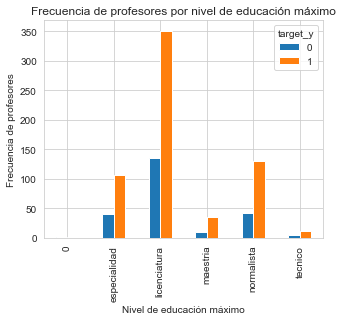

In [19]:
# grafica de 
pd.crosstab(df.nivel_educacion_maximo,df.target_y).plot(kind='bar')
plt.title('Frecuencia de profesores por nivel de educación máximo')
plt.xlabel('Nivel de educación máximo')
plt.ylabel('Frecuencia de profesores')
#plt.savefig('purchase_fre_job')

Text(0, 0.5, 'Frecuencia de profesores')

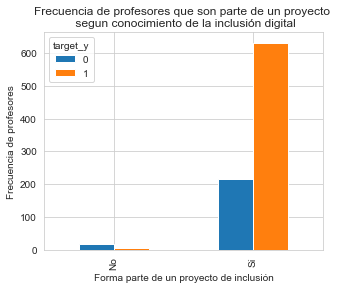

In [24]:
# grafica de 
pd.crosstab(df.parte_proyecto_inclusion,df.target_y).plot(kind='bar')
plt.title('Frecuencia de profesores que son parte de un proyecto \n segun conocimiento de la inclusión digital')
plt.xlabel('Forma parte de un proyecto de inclusión')
plt.ylabel('Frecuencia de profesores')
#plt.savefig('purchase_fre_job')

In [45]:
label_encoder = preprocessing.LabelEncoder()
df['target_y'] = label_encoder.fit_transform(df['sabe_inclusion_digital'])
df['pproyinc'] = label_encoder.fit_transform(df['parte_proyecto_inclusion'])
df['neducmax'] = label_encoder.fit_transform(df['nivel_educacion_maximo'])
#df['smartphone'] = label_encoder.fit_transform(df['tiene_smartphone'])
df['gender'] = label_encoder.fit_transform(df['sexo'])
df.head()

,parte_proyecto_inclusion,sexo,edad,departamento,ciudad,unidad_educativa,nivel_educacion_maximo,anios_experiencia,tiempo_ue_actual,tiempo_ue_actual_num,...,usa_skype,dias_uso_internet,so,conoce_soft_libre,existe_laboratorio,sabe_inclusion_digital,target_y,pproyinc,neducmax,gender
0,Sí,Masculino,32,Santa Cruz,Santa Cruz de la Sierra,NACIONAL COTOCA,licenciatura,20,Más de un año,15.0,...,No,7.0,Windows,Sí,Sí,Sí,1,1,2,1
1,Sí,Masculino,38,La Paz,El Alto,PRIMAVERA B,licenciatura,19,Más de un año,5.0,...,No,5.0,Windows,Sí,Sí,Sí,1,1,2,1
2,Sí,Femenino,54,La Paz,La Paz,DOMINGO FAUSTINO SARMIENTO,especialidad,20,Más de un año,5.0,...,Sí,7.0,Linux,Sí,Sí,Sí,1,1,1,0
3,Sí,Femenino,54,La Paz,La Paz,ABRAHAM REYES FE Y ALEGRIA,licenciatura,26,Menos de un año,NaN,...,No,5.0,Windows,Sí,Sí,Sí,1,1,2,0
4,Sí,Masculino,34,La Paz,La Paz,ABRAHAM REYES FE Y ALEGRIA,licenciatura,10,Más de un año,7.0,...,No,7.0,Windows,Sí,Sí,Sí,1,1,2,1


In [16]:
#contabilizar las categorias de la variable target
df['target_y'].value_counts()

1    636
0    235
Name: target_y, dtype: int64

In [65]:
nomcol = ['pproyinc','neducmax','gender','edad','anios_experiencia','target_y']
df1=df[nomcol]
df1.head()

,pproyinc,neducmax,gender,edad,anios_experiencia,target_y
0,1,2,1,32,20,1
1,1,2,1,38,19,1
2,1,1,0,54,20,1
3,1,2,0,54,26,1
4,1,2,1,34,10,1


In [66]:
X= df1[df1.columns[:-1]]
y= df1['target_y']
X.head()

,pproyinc,neducmax,gender,edad,anios_experiencia
0,1,2,1,32,20
1,1,2,1,38,19
2,1,1,0,54,20
3,1,2,0,54,26
4,1,2,1,34,10


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [68]:
clf = MixedNB(categorical_features=[0,1,2])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

[2 6 2]
0.7748091603053435
